In [2]:
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
import numpy as np
import numpy as np
import generate_nufft # Generate the data sampled by Spiral Trajectory using NUFFT
import generate_input # Generatre the data sampled by Cartesion Trajectory using FFT
import manifold_recon # Forward the network for Spiral
%matplotlib notebook

# Load trajectory and weightings for NUFFT

In [3]:
dcf = np.load("dcf.npy") # weighting for inverse NUFFT

In [4]:
coord_1 = np.load('coord.npy')

coord = coord_1*32/np.max(coord_1)


# Genreate images and spiral k-space

In [5]:
X_test,Y_test = generate_nufft.load_images_from_folder('image_real/',5,coord,normalize=False,imrotate=True)

In [6]:
recon_inufft = sp.nufft_adjoint(dcf*(X_test[:,:,:,0]+1j*X_test[:,:,:,1]), coord)

<IPython.core.display.Javascript object>


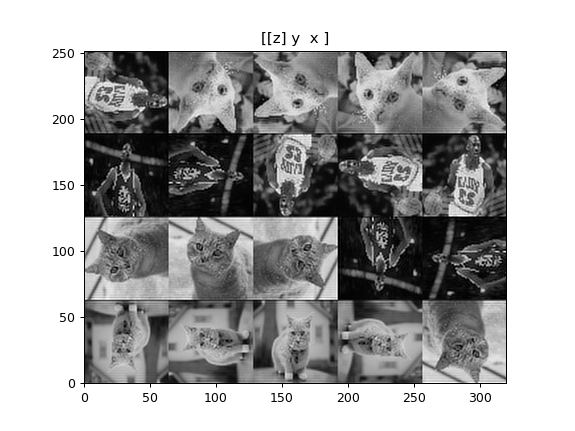

In [12]:
pl.ImagePlot(recon_inufft)

<IPython.core.display.Javascript object>


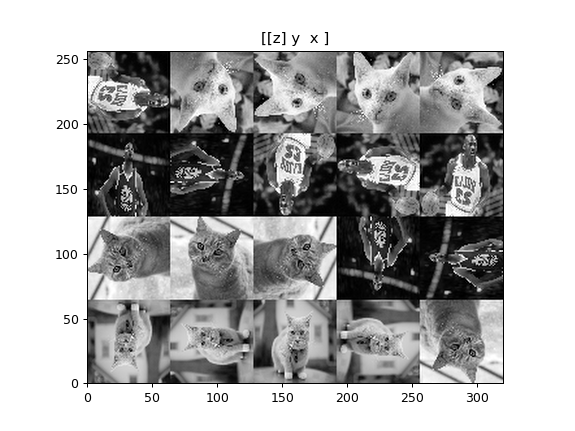

In [13]:
pl.ImagePlot(Y_test) # Ground Truth`

In [10]:
Y_forward = manifold_recon.forward_model(X_test, np.zeros(Y_test.shape),"model_test/model_maniflod_spiral.ckpt")

INFO:tensorflow:Restoring parameters from model_test/model_maniflod_spiral.ckpt
Model restored


<IPython.core.display.Javascript object>


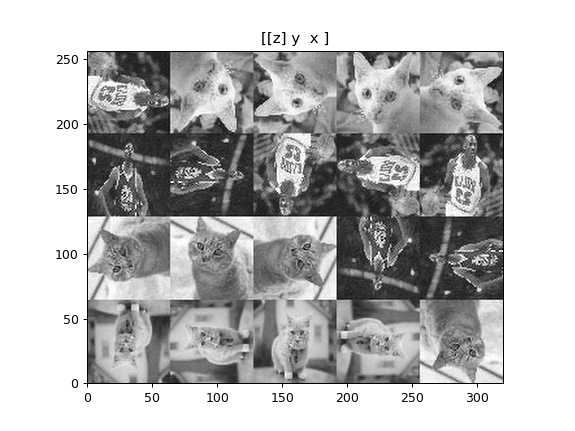

In [14]:
pl.ImagePlot(Y_forward)

<IPython.core.display.Javascript object>


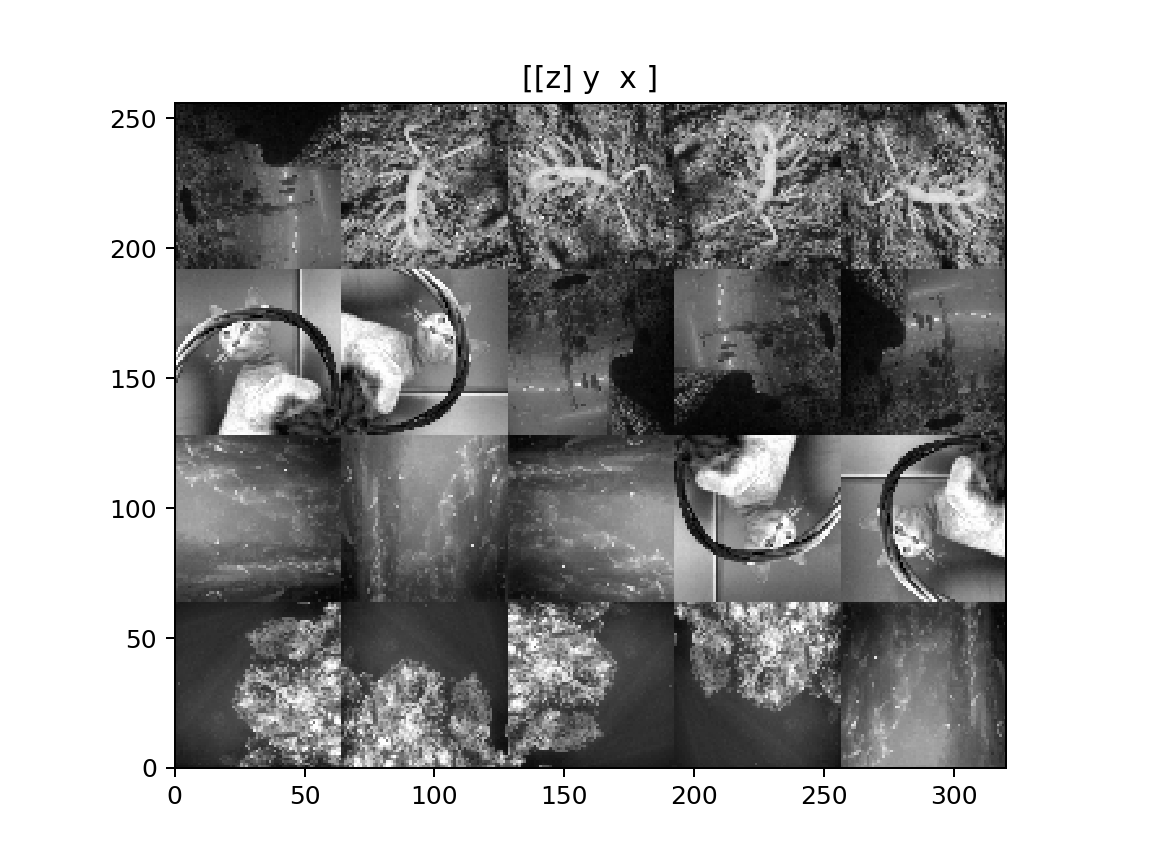

In [15]:
pl.Image(Y_train)